The polynomial regression takes the form
y = b0 + b1x + b2x^2 + ... + bnx^2
We do this for each x
It is called polynomial linear regression since the bs are linear to the y

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


##Preprocess Our Data

In [7]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
#The .values prints it out in numpy array.
#Since there is 1-1 correspondence between position and level, we dont need to encode it,we are using only level

In [9]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [10]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

##We use the linear regression model without tuning our X into the exponentials




In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #We create the object from the class
lin_reg.fit(X, y) #We tell the object to train our train sets


LinearRegression()

##We tune our X to a polynomial of degree 2

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_reg_2.fit_transform(X)

##Now we train the X of degree 2 using Linear Regression model

In [19]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2,y)

LinearRegression()

##We get the predicted for each type

In [24]:
#For Linear without tuning to a degree
y_pred_lin = lin_reg.predict(X)
y_pred_lin

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

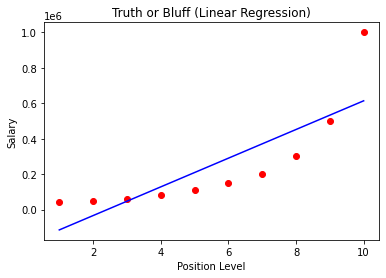

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_lin, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [26]:
#We can see the model is not performing well due to the fact it was not tuned well

In [27]:
#For degree 2

In [30]:
y_pred_lin_reg_2 = lin_reg_2.predict(X_poly_2)
y_pred_lin_reg_2 


array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

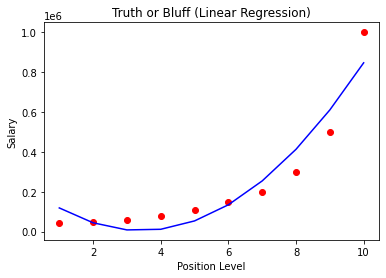

In [31]:
plt.scatter(X, y, color = 'red') #plots X and y
plt.plot(X, y_pred_lin_reg_2 , color = 'blue') #Plots the tuned y against our original X
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [32]:
#We can see it gets better, in fact it gets better as the degree increases

##n=3

In [34]:
#Tune to n =3
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_reg_3.fit_transform(X)

In [35]:
#use linear model to train using X of degree 3
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3,y)

LinearRegression()

In [37]:
#Predicting using X degree 3
y_pred_lin_reg_3 = lin_reg_3.predict(X_poly_3)
y_pred_lin_reg_3


array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
        83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846154])

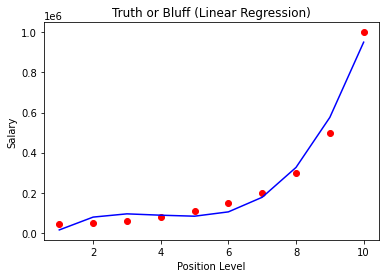

In [40]:
X_grid = np.arange(min(X), max(X), 0.1) #For smoother curves
X_grid = X_grid.reshape((len(X_grid), 1)) #For smoother curves
plt.scatter(X, y, color = 'red') #plots X and y
plt.plot(X, y_pred_lin_reg_3 , color = 'blue') #Plots the tuned y against our original X
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

##n=4

In [41]:
#Tune to n =4
from sklearn.preprocessing import PolynomialFeatures
poly_reg_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_reg_4.fit_transform(X)

In [42]:
#use linear model to train using X of degree 4
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4,y)

LinearRegression()

In [44]:
#Predicting using X degree 4
y_pred_lin_reg_4 = lin_reg_4.predict(X_poly_4)
y_pred_lin_reg_4


array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391613])

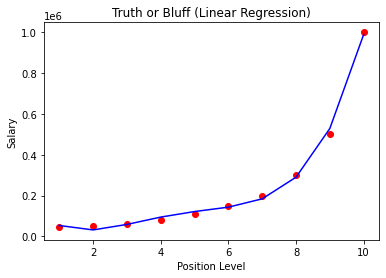

In [45]:
X_grid = np.arange(min(X), max(X), 0.1) #For smoother curves
X_grid = X_grid.reshape((len(X_grid), 1)) #For smoother curves
plt.scatter(X, y, color = 'red') #plots X and y
plt.plot(X, y_pred_lin_reg_4 , color = 'blue') #Plots the tuned y against our original X
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [46]:
#We see that n=4 is really good

##We gonna predict 6.5 using n=4 and linear to see how n =4 is way better than the linear

In [49]:
#6.5 years got 160k so we check what we should pay the person is lying or not using our models


In [50]:
lin_reg.predict([[6.5]]) #mumu model


array([330378.78787879])

In [53]:
#We must tune the 6.5 to degree n=4
lin_reg_4.predict(poly_reg_4.fit_transform([[6.5]])) #So the person is saying the truth


array([158862.45265155])